# Phishing Websites Detection

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [13]:
data = pd.read_csv('/content/drive/MyDrive/ineuron intenship/dataset_full.csv')
data.drop_duplicates(inplace=True) # Drop Duplicate Data

data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [14]:
data.tls_ssl_certificate.unique()

array([0, 1])

In [15]:
data["asn_ip"].unique()

array([ 60781,  36024,   4766, ...,   6753, 393386,   6794])

# Data Visualization

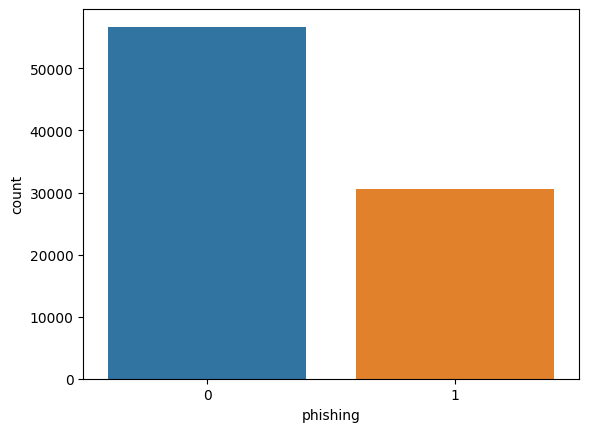

In [16]:
sns.countplot(data=data, x='phishing')
plt.show()

In [17]:
print("1 :", data.phishing.sum())
print("0 :", data.shape[0]-data.phishing.sum())

1 : 30497
0 : 56712


In [18]:
X = data.drop(columns=["phishing"])
y = data.phishing

# Feature Selection

1. Dropping Constant Features
2. Removing Highly Correlated Features

## 1. Dropping constant features


In [19]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(X)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_new = X[X.columns[var.get_support()]]

print("Columns Left :",len(X_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


## 2. Drop Highly Correlated Features

In [20]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [21]:
corr_features = correlation(X, .6)
sum(var.get_support()) - len(corr_features)
X_new = X.drop(corr_features, axis=1)

In [22]:
print("Number of Column Dropped", len(X.columns) - len(X_new.columns) )

X = X_new
print("Columns Left :",len(X_new.columns))

Number of Column Dropped 57
Columns Left : 54


## 3. Mutual Information

The Mutual Information between two random variables measures how much information can be obtained from a random variable by observing another random variable.from sklearn.model_selection import train_test_split

In [23]:
from sklearn.feature_selection import mutual_info_classif

In [24]:
a = mutual_info_classif(X,y)

In [25]:
a.shape

(54,)

In [26]:
a

array([5.72410945e-02, 5.05014901e-02, 3.70723004e-02, 3.74713563e-01,
       8.86314102e-03, 6.30162205e-02, 2.18379140e-02, 2.27162764e-04,
       0.00000000e+00, 3.93696652e-03, 2.00202167e-03, 2.36479691e-03,
       0.00000000e+00, 0.00000000e+00, 9.51982443e-04, 1.12451410e-02,
       3.72136516e-02, 7.30995507e-02, 1.04539108e-02, 1.65873866e-03,
       0.00000000e+00, 0.00000000e+00, 3.03252687e-03, 6.24492510e-04,
       0.00000000e+00, 1.02134740e-03, 1.64596779e-04, 1.87853858e-03,
       7.24699811e-05, 0.00000000e+00, 0.00000000e+00, 6.08879896e-04,
       0.00000000e+00, 3.14930355e-04, 1.13299210e-02, 1.05720654e-03,
       0.00000000e+00, 7.27999837e-02, 7.34518687e-02, 7.14383234e-02,
       9.08202670e-03, 1.66296724e-02, 1.67865779e-01, 2.23467840e-01,
       5.90961148e-02, 1.47343093e-02, 1.23750020e-02, 1.70027561e-02,
       9.29003739e-02, 1.14984025e-02, 1.26215204e-02, 2.14357234e-03,
       0.00000000e+00, 3.14401731e-03])

In [27]:
mutual_info = pd.Series(a)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

In [28]:
mutual_info

qty_slash_url              0.374714
time_domain_activation     0.223468
asn_ip                     0.167866
ttl_hostname               0.092900
qty_slash_params           0.073452
qty_dot_domain             0.073100
qty_hyphen_params          0.072800
qty_percent_params         0.071438
qty_equal_url              0.063016
time_domain_expiration     0.059096
qty_dot_url                0.057241
qty_hyphen_url             0.050501
qty_tld_url                0.037214
qty_underline_url          0.037072
qty_at_url                 0.021838
qty_mx_servers             0.017003
domain_spf                 0.016630
qty_ip_resolved            0.014734
qty_redirects              0.012622
qty_nameservers            0.012375
tls_ssl_certificate        0.011498
qty_vowels_domain          0.011330
qty_percent_url            0.011245
qty_hyphen_domain          0.010454
time_response              0.009082
qty_questionmark_url       0.008863
qty_tilde_url              0.003937
url_shortened              0

In [29]:
mutual_info = mutual_info[mutual_info > 0]

In [30]:
len(mutual_info)

43

In [31]:
X = X[mutual_info.index]

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training with Random Forest Classifier

### Hyperparameter Tuning

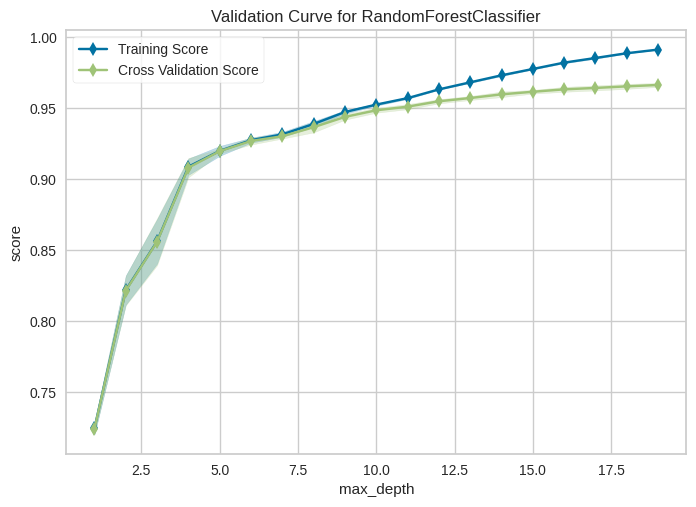

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [33]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

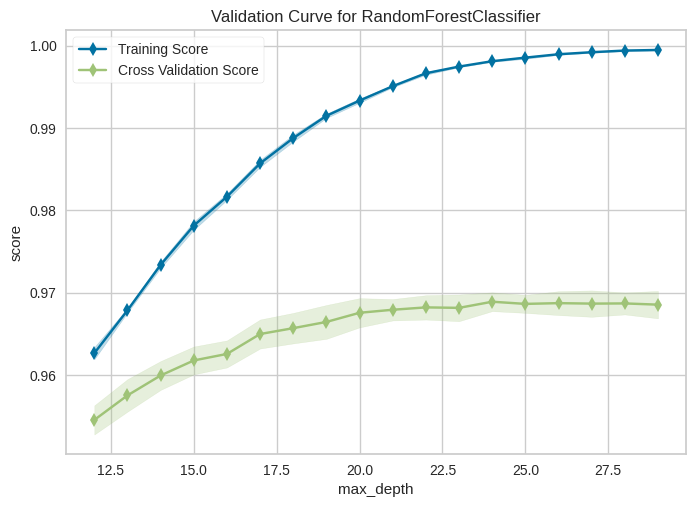

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [34]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(12, 30), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

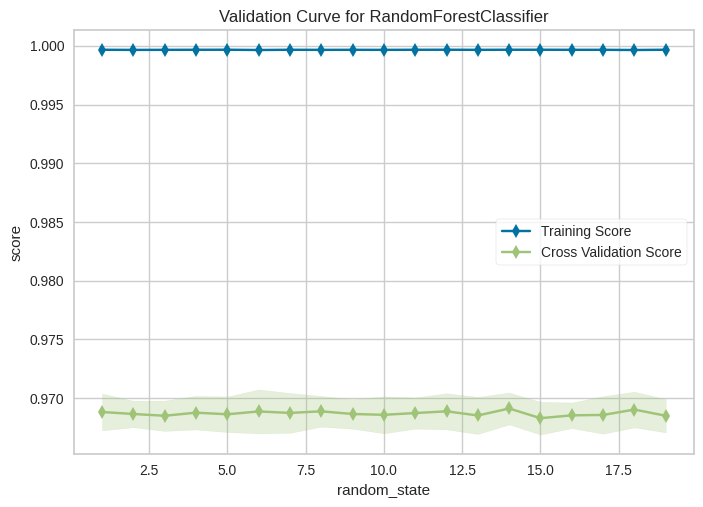

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [35]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

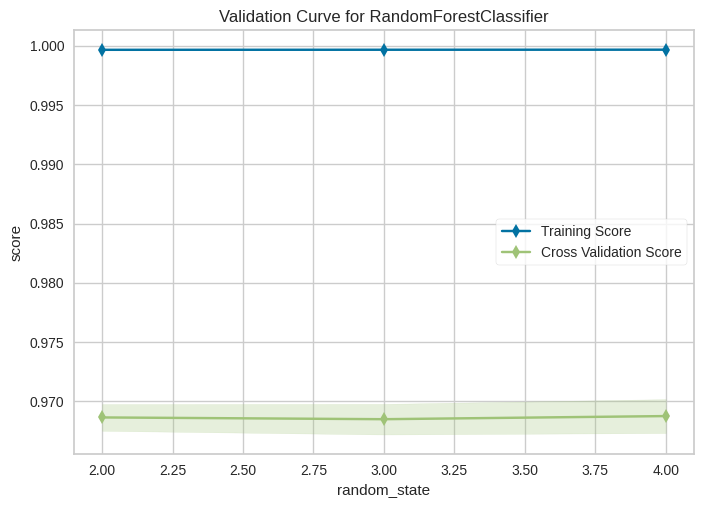

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [36]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(2, 5), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

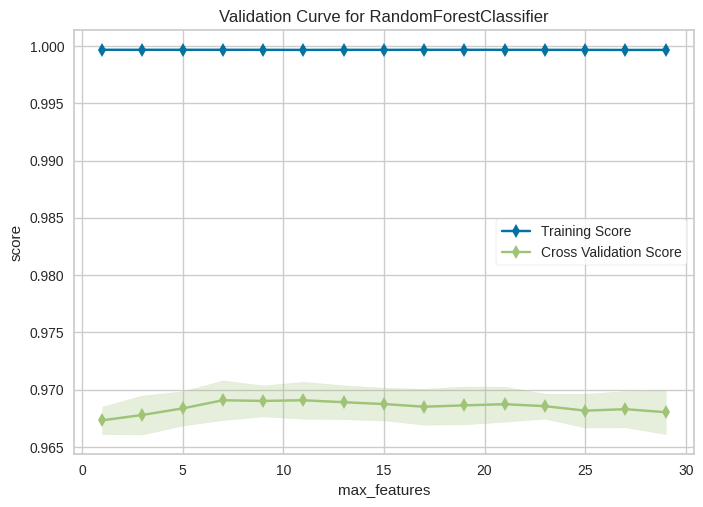

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>

In [37]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_features",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

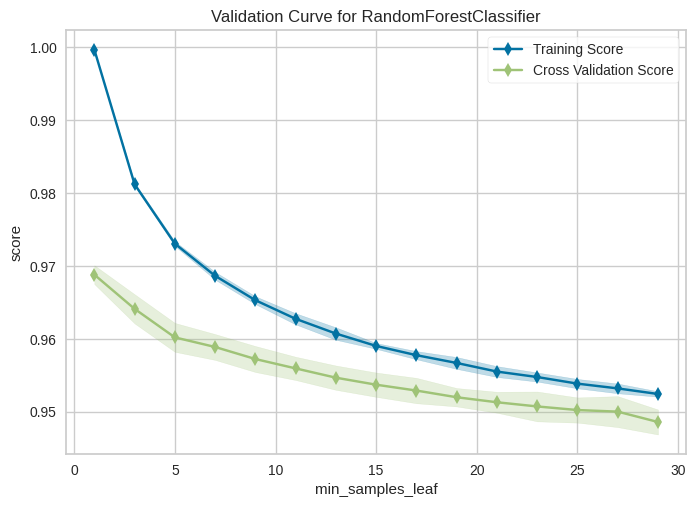

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>

In [38]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_leaf",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

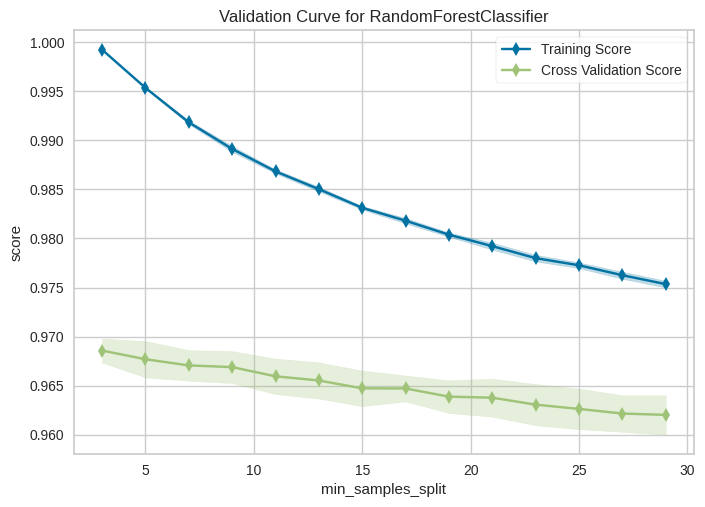

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>

In [39]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_split",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

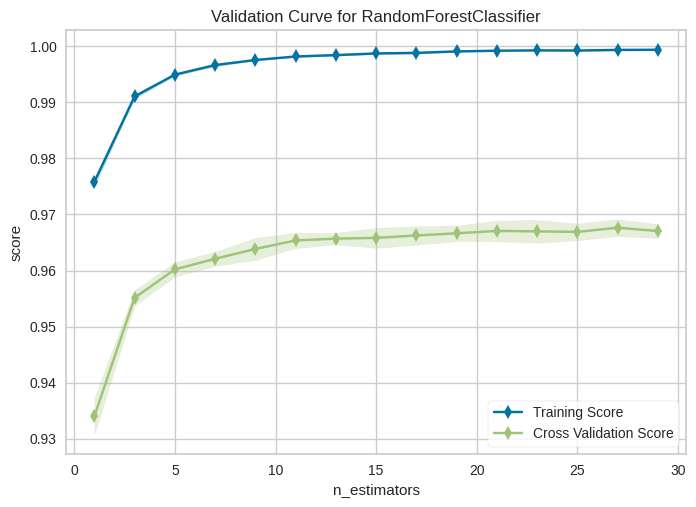

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>

In [40]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

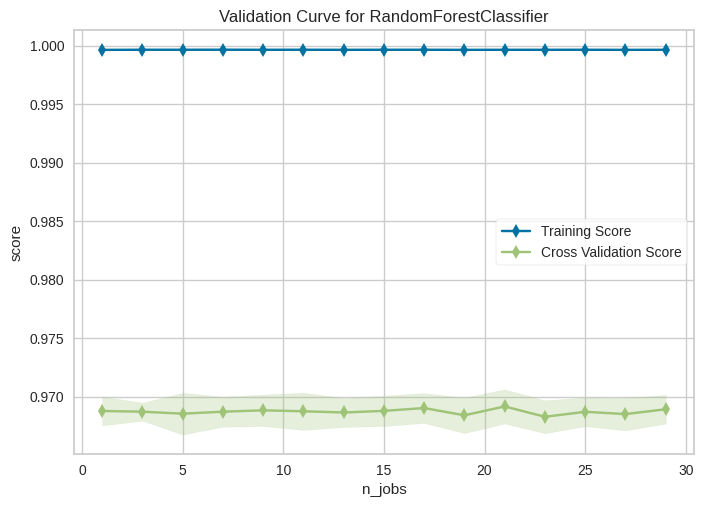

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_jobs', ylabel='score'>

In [41]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_jobs",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3, max_features=8, n_jobs=8, n_estimators=25)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.964731227631259

# Feature Importances

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


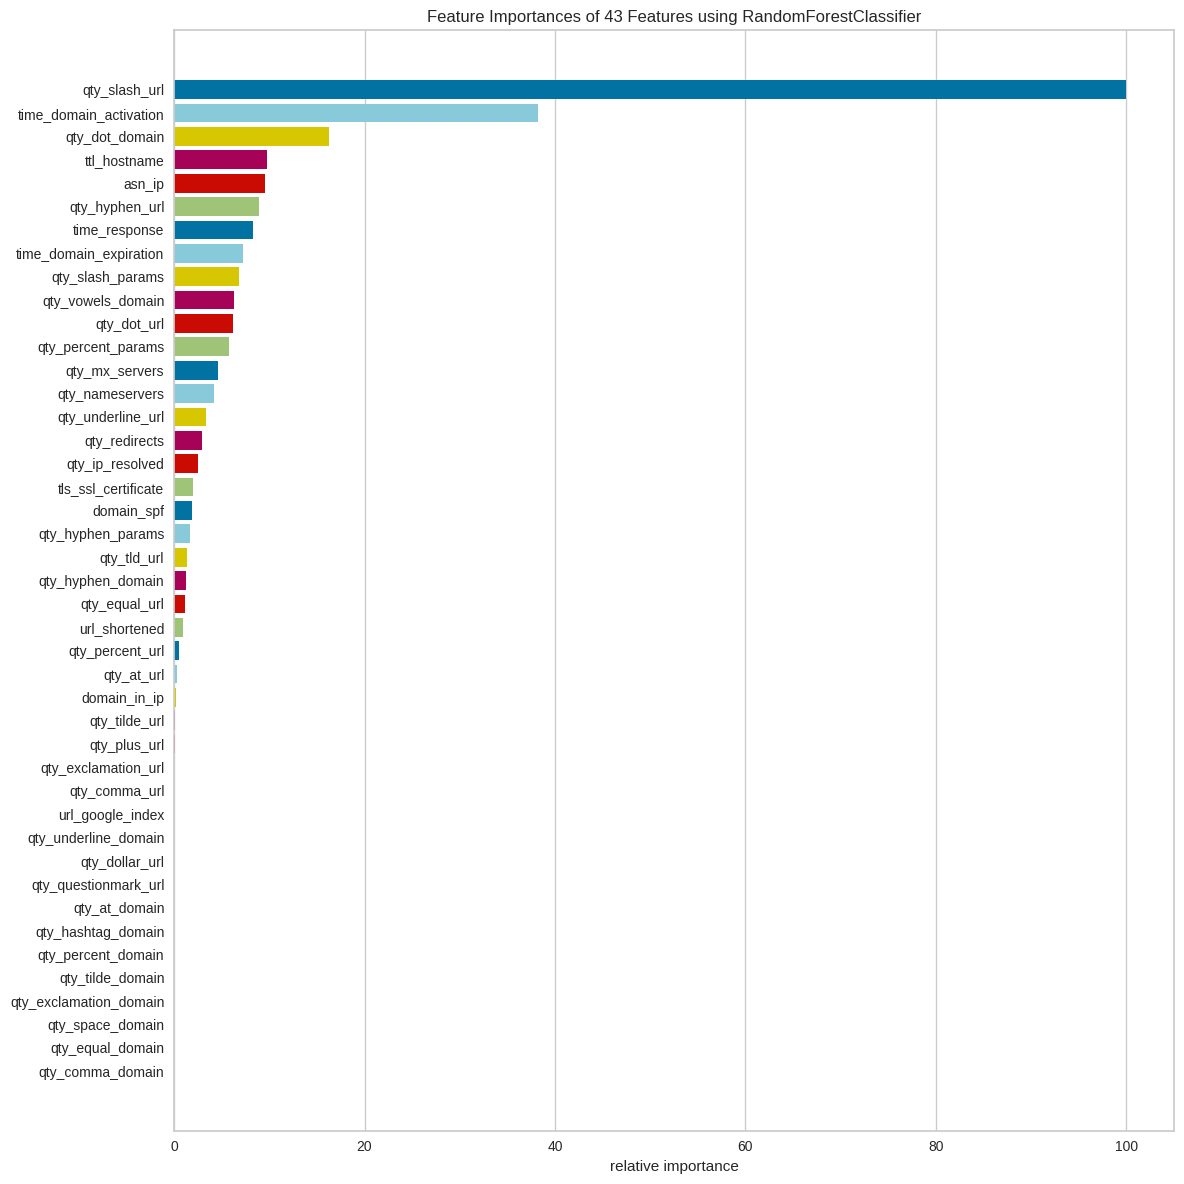

<Axes: title={'center': 'Feature Importances of 43 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [43]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc)
viz.fit(X, y)
viz.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


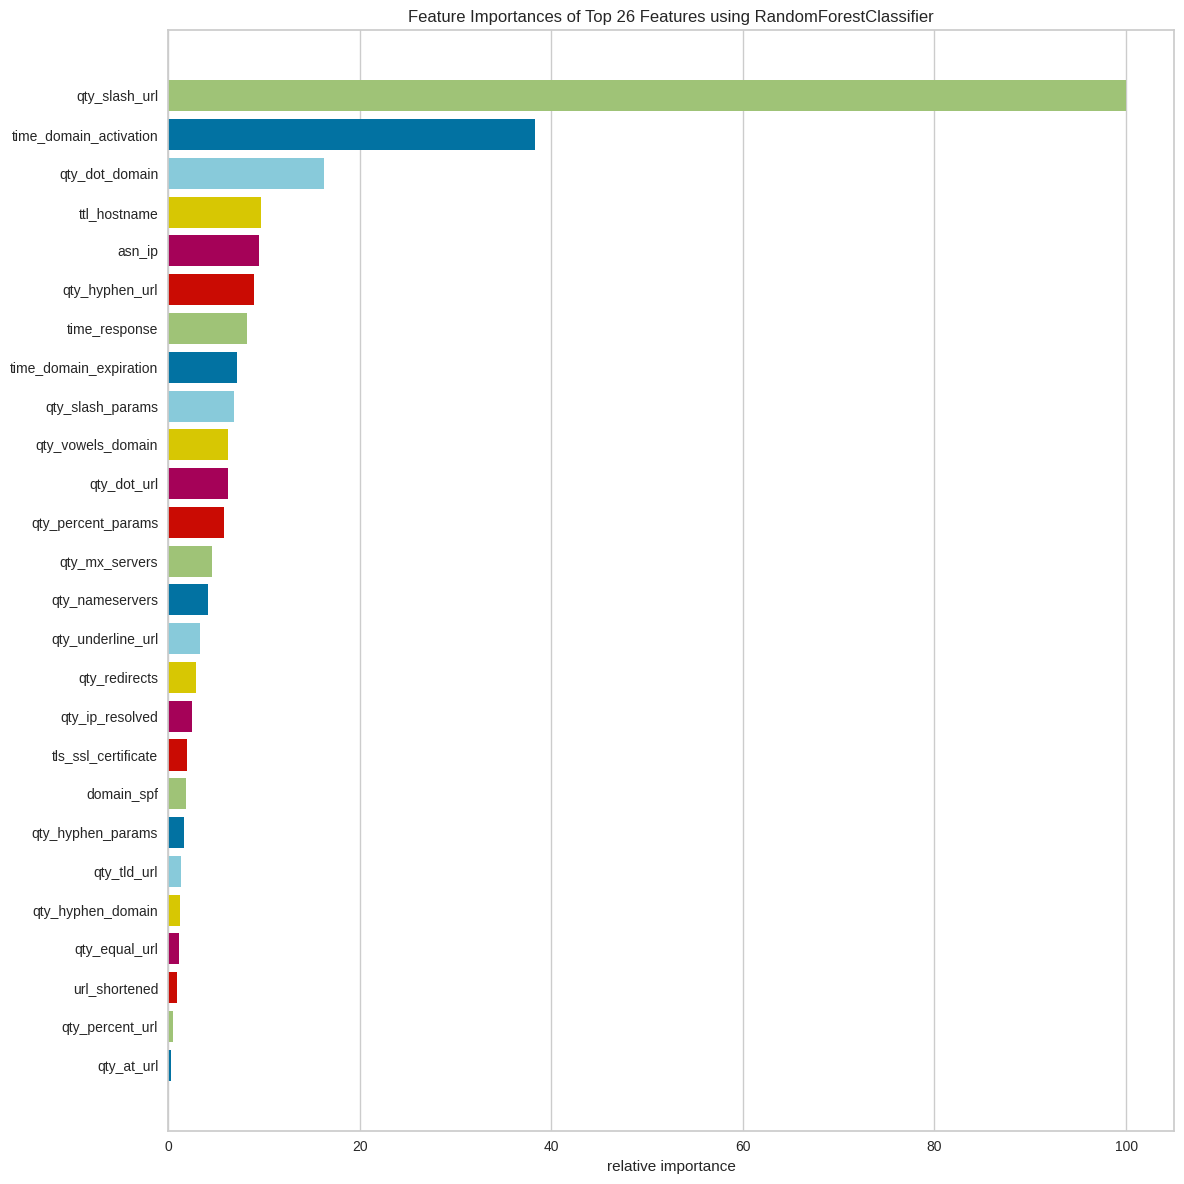

<Axes: title={'center': 'Feature Importances of Top 26 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [44]:
plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc, topn=26)
viz.fit(X, y)
viz.show()

In [45]:
len(viz.features_)

26

In [46]:
X_train = X_train[viz.features_]
X_test = X_test[viz.features_]

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9649397129851628

## Class Prediction Error

In [48]:
import warnings
warnings.simplefilter("ignore")

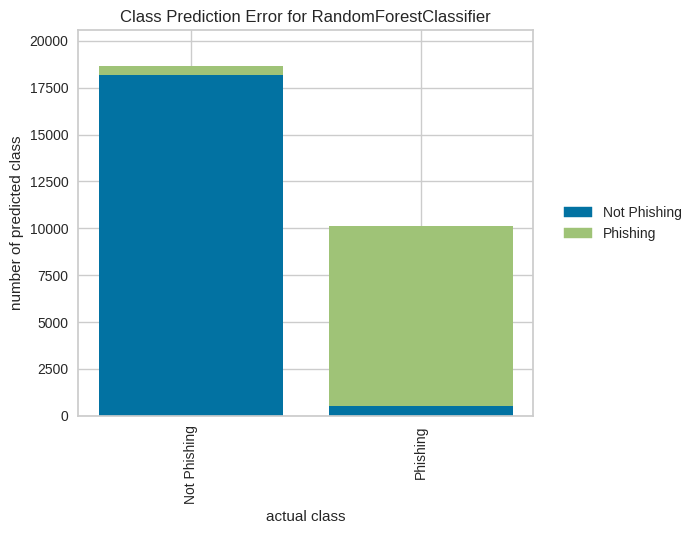

In [49]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

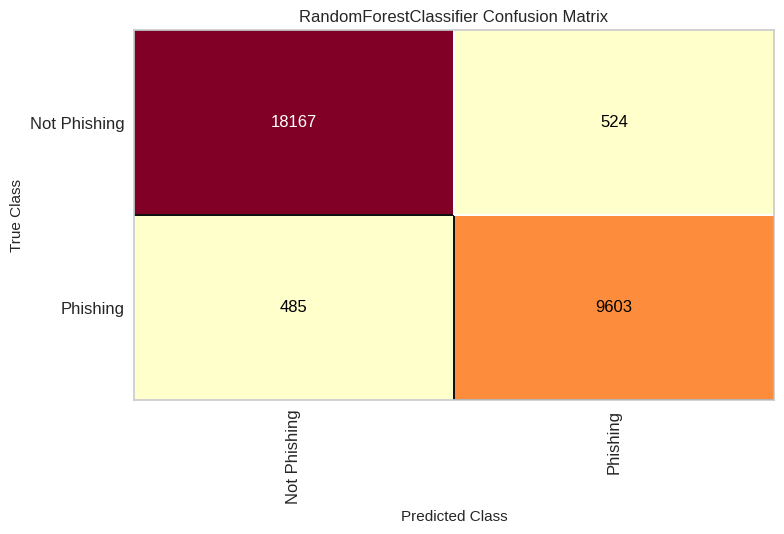

In [50]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
cm.score(X_test, y_test)
cm.show()
plt.show()

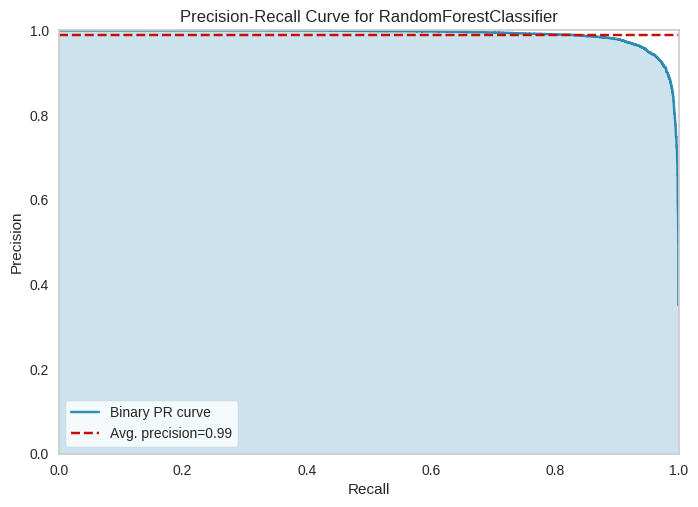

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(rfc)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

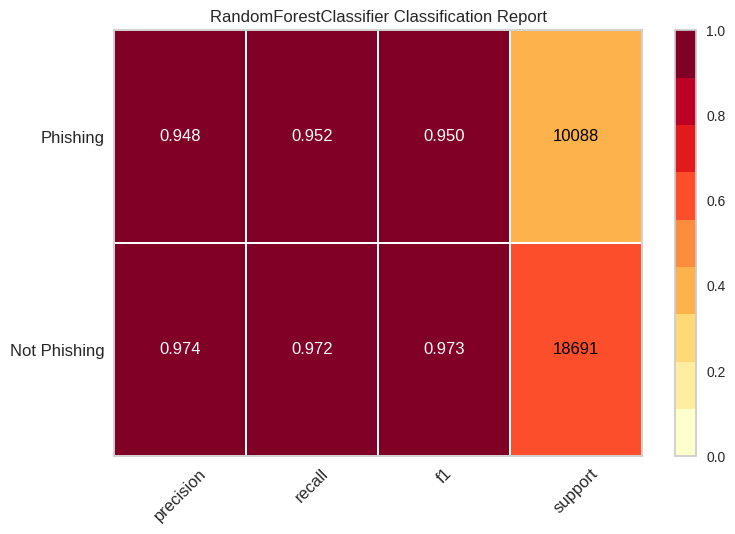

In [52]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

In [53]:
X_train.columns

Index(['qty_at_url', 'qty_percent_url', 'url_shortened', 'qty_equal_url',
       'qty_hyphen_domain', 'qty_tld_url', 'qty_hyphen_params', 'domain_spf',
       'tls_ssl_certificate', 'qty_ip_resolved', 'qty_redirects',
       'qty_underline_url', 'qty_nameservers', 'qty_mx_servers',
       'qty_percent_params', 'qty_dot_url', 'qty_vowels_domain',
       'qty_slash_params', 'time_domain_expiration', 'time_response',
       'qty_hyphen_url', 'asn_ip', 'ttl_hostname', 'qty_dot_domain',
       'time_domain_activation', 'qty_slash_url'],
      dtype='object')

In [54]:
X_train.head()

,qty_at_url,qty_percent_url,url_shortened,qty_equal_url,qty_hyphen_domain,qty_tld_url,qty_hyphen_params,domain_spf,tls_ssl_certificate,qty_ip_resolved,...,qty_vowels_domain,qty_slash_params,time_domain_expiration,time_response,qty_hyphen_url,asn_ip,ttl_hostname,qty_dot_domain,time_domain_activation,qty_slash_url
20542,0,0,0,0,0,1,-1,-1,0,1,...,7,-1,-1,0.121921,0,19089,14388,4,7979,0
24503,0,0,0,0,0,1,-1,0,1,1,...,6,-1,78,2.149164,0,26347,14398,2,286,1
22241,0,0,0,0,0,1,-1,0,1,2,...,3,-1,-1,0.228898,1,2818,246,3,-1,3
74482,0,0,0,0,0,1,-1,0,1,2,...,2,-1,426,0.681484,0,13335,299,2,4686,1
56925,0,0,0,0,0,1,-1,0,1,1,...,7,-1,-1,3.744493,0,38,100,3,-1,0


# Save Model

In [55]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(rfc, files)

In [56]:
ls

drive/  model_pkl  sample_data/
